In [9]:
import numpy as np
from keras import Model
from keras.layers import Conv2D, PReLU,BatchNormalization, Flatten,UpSampling2D,Conv2DTranspose
from keras.layers import UpSampling2D, LeakyReLU, Dense, Input, add,Add,concatenate,Concatenate,Dropout,MaxPooling2D
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot
from IPython.display import HTML, display, clear_output, SVG
import pydot
import graphviz
from keras.applications import VGG19
import glob
import cv2 as cv
import warnings

In [23]:
def dense_layer(x, layer_configs):
    layers = []
    for i in range(2):
        if layer_configs[i]["layer_type"] == "Conv2D":
            layer = Conv2D(layer_configs[i]["filters"], layer_configs[i]["kernel_size"], strides = layer_configs[i]["strides"], padding = layer_configs[i]["padding"], activation = layer_configs[i]["activation"])(x)
        layers.append(layer)
    for n in range(2, len(layer_configs)):
        if layer_configs[n]["layer_type"] == "Conv2D":
            layer = Conv2D(layer_configs[n]["filters"], layer_configs[n]["kernel_size"], strides = layer_configs[n]["strides"], padding = layer_configs[n]["padding"], activation = layer_configs[n]["activation"])(concatenate(layers, axis = 3))
        layers.append(layer)
    return layer,layers

In [11]:
layer_f8 = [
    {
        "layer_type" : "Conv2D", "filters" : 8, "kernel_size" : (3, 3), "strides" : 1, "padding" : "same", "activation" : "relu"
    },{
        "layer_type" : "Conv2D", "filters" : 8, "kernel_size" : (3, 3), "strides" : 1, "padding" : "same", "activation" : "relu"
    },{
        "layer_type" : "Conv2D", "filters" : 8, "kernel_size" : (3, 3), "strides" : 1, "padding" : "same", "activation" : "relu"
    },{
        "layer_type" : "Conv2D", "filters" : 8, "kernel_size" : (3, 3), "strides" : 1, "padding" : "same", "activation" : "relu"
    },{
        "layer_type" : "Conv2D", "filters" : 8, "kernel_size" : (3, 3), "strides" : 1, "padding" : "same", "activation" : "relu"
    }
]

layer_f16 = [
    {
        "layer_type" : "Conv2D", "filters" : 16, "kernel_size" : (3, 3), "strides" : 1, "padding" : "same", "activation" : "relu"
    },{
        "layer_type" : "Conv2D", "filters" : 16, "kernel_size" : (3, 3), "strides" : 1, "padding" : "same", "activation" : "relu"
    },{
        "layer_type" : "Conv2D", "filters" : 16, "kernel_size" : (3, 3), "strides" : 1, "padding" : "same", "activation" : "relu"
    },{
        "layer_type" : "Conv2D", "filters" : 16, "kernel_size" : (3, 3), "strides" : 1, "padding" : "same", "activation" : "relu"
    },{
        "layer_type" : "Conv2D", "filters" : 16, "kernel_size" : (3, 3), "strides" : 1, "padding" : "same", "activation" : "relu"
    }
]

layer_f32 = [
    {
        "layer_type" : "Conv2D", "filters" : 32, "kernel_size" : (3, 3), "strides" : 1, "padding" : "same", "activation" : "relu"
    },{
        "layer_type" : "Conv2D", "filters" : 32, "kernel_size" : (3, 3), "strides" : 1, "padding" : "same", "activation" : "relu"
    },{
        "layer_type" : "Conv2D", "filters" : 32, "kernel_size" : (3, 3), "strides" : 1, "padding" : "same", "activation" : "relu"
    },{
        "layer_type" : "Conv2D", "filters" : 32, "kernel_size" : (3, 3), "strides" : 1, "padding" : "same", "activation" : "relu"
    },{
        "layer_type" : "Conv2D", "filters" : 32, "kernel_size" : (3, 3), "strides" : 1, "padding" : "same", "activation" : "relu"
    }
]

layer_f64 = [
    {
        "layer_type" : "Conv2D", "filters" : 64, "kernel_size" : (3, 3), "strides" : 1, "padding" : "same", "activation" : "relu"
    },{
        "layer_type" : "Conv2D", "filters" : 64, "kernel_size" : (3, 3), "strides" : 1, "padding" : "same", "activation" : "relu"
    },{
        "layer_type" : "Conv2D", "filters" : 64, "kernel_size" : (3, 3), "strides" : 1, "padding" : "same", "activation" : "relu"
    },{
        "layer_type" : "Conv2D", "filters" : 64, "kernel_size" : (3, 3), "strides" : 1, "padding" : "same", "activation" : "relu"
    },{
        "layer_type" : "Conv2D", "filters" : 64, "kernel_size" : (3, 3), "strides" : 1, "padding" : "same", "activation" : "relu"
    }
]

layer_f128 = [
    {
        "layer_type" : "Conv2D", "filters" : 128, "kernel_size" : (3, 3), "strides" : 1, "padding" : "same", "activation" : "relu"
    },{
        "layer_type" : "Conv2D", "filters" : 128, "kernel_size" : (3, 3), "strides" : 1, "padding" : "same", "activation" : "relu"
    },{
        "layer_type" : "Conv2D", "filters" : 128, "kernel_size" : (3, 3), "strides" : 1, "padding" : "same", "activation" : "relu"
    },{
        "layer_type" : "Conv2D", "filters" : 128, "kernel_size" : (3, 3), "strides" : 1, "padding" : "same", "activation" : "relu"
    },{
        "layer_type" : "Conv2D", "filters" : 128, "kernel_size" : (3, 3), "strides" : 1, "padding" : "same", "activation" : "relu"
    }
]

In [12]:
inp = Input(shape = (32, 32, 3))
x = inp
x = Conv2D(4, (3, 3), strides = 1, padding = "same", activation = "relu")(x)
x = dense_layer(x, layer_f8)
x = Dropout(0.8)(x)

x = BatchNormalization(axis = 3)(x)
x = dense_layer(x, layer_f16)
x = Dropout(0.8)(x)

x = BatchNormalization(axis = 3)(x)
x = dense_layer(x, layer_f32)
x = Dropout(0.8)(x)

x = BatchNormalization(axis = 3)(x)
x = dense_layer(x, layer_f64)
x = Dropout(0.8)(x)

x = BatchNormalization(axis = 3)(x)
x = dense_layer(x, layer_f128)
x = Dropout(0.8)(x)
x = MaxPooling2D((2, 2))(x)
x = BatchNormalization(axis = 3)(x)
x = Conv2D(96, (1, 1), activation = "relu")(x)
x = BatchNormalization(axis = 3)(x)

x = MaxPooling2D((2, 2))(x)
x = BatchNormalization(axis = 3)(x)
x = Flatten()(x)

x = Dropout(0.4)(x)
x = Dense(14, activation = "softmax")(x)

dense_net = Model(inp, x)
dense_net.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_33 (Conv2D)              (None, 32, 32, 4)    112         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_34 (Conv2D)              (None, 32, 32, 8)    296         conv2d_33[0][0]                  
__________________________________________________________________________________________________
conv2d_35 (Conv2D)              (None, 32, 32, 8)    296         conv2d_33[0][0]                  
__________________________________________________________________________________________________
concatenat

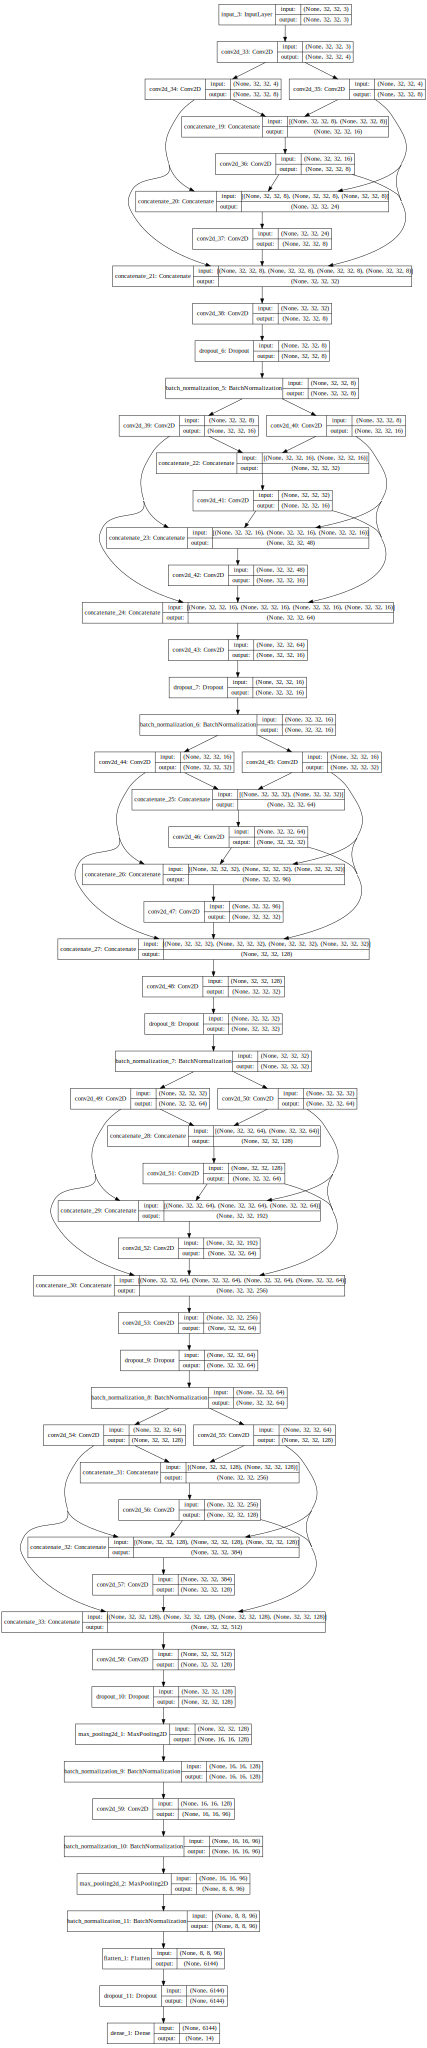

In [15]:
SVG(model_to_dot(dense_net,show_layer_names=True,show_shapes=True,rankdir='TB').create(prog='dot',format='svg'))